In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import scipy

# Gaussian theoretical ROC

In [2]:
def Gaussian_theoretical_ROC(FPR, mu_0, mu_1, sigma):
    return 1-scipy.stats.norm.cdf(scipy.stats.norm.ppf(1-FPR, loc=mu_0, scale=sigma), loc=mu_1, scale=sigma)



In [3]:
def plot_theoretical_ROC(FPR, TPR_list, sigma_array, title):
    colors = list(mcolors.BASE_COLORS)
    for i, TPR in enumerate(TPR_list):
        plt.plot(FPR, TPR, label='sigma: '+str(sigma_array[i]), color=colors[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc ="lower right")
    plt.title(title)
    plt.show()


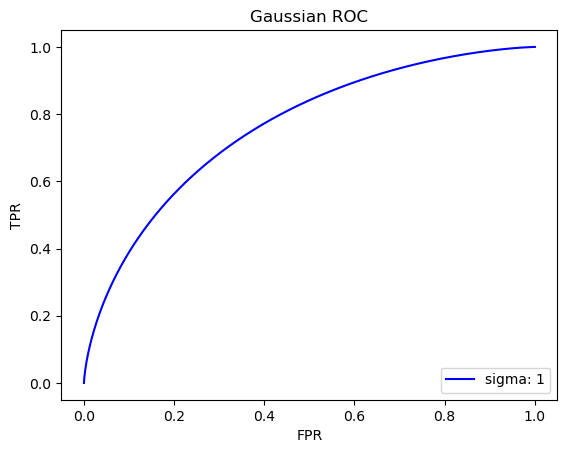

In [4]:
FPR_range = np.linspace(0, 1, 1000)
mu_0 = 0
mu_1 = 1
sigma = 1
TPR_list = [Gaussian_theoretical_ROC(FPR_range, mu_0, mu_1, sigma)]
params = [sigma]
plot_theoretical_ROC(FPR_range, TPR_list, params, 'Gaussian ROC')


# Gaussian deicion rule

In [5]:
def Gaussian_decision_rule(sample, FPR, mu_1, sigma):
    return sample > scipy.stats.norm.ppf(FPR, loc=mu_1, scale=sigma)

def Gaussian_experiment(mu_0, mu_1, sigma, num_trials, FPR):
    sam_0 = np.random.normal(mu_0, sigma, num_trials)
    sam_1 = np.random.normal(mu_1, sigma, num_trials)
    exp_0 = Gaussian_decision_rule(sam_0, FPR, mu_1, sigma)
    exp_1 = Gaussian_decision_rule(sam_1, FPR, mu_1, sigma)
    TP = np.sum(exp_1)
    FN = num_trials - TP
    FP = np.sum(exp_0)
    TN = num_trials - FP
    return np.array([TP, FN, FP, TN])

In [6]:
def plot_ROC(results_array, FPR, TPR_list, sigma_array, title):
    colors = list(mcolors.BASE_COLORS)
    for i, results in enumerate(results_array):
        plt.plot(FPR, TPR_list[i], label='Theory - sigma: '+str(sigma_array[i]), color=colors[i])
        TP = results[:,0]
        FN = results[:,1]
        FP = results[:,2]
        TN = results[:,3]
        TPR = TP/(TP+FN)
        FPR_emp = FP/(FP+TN)
        plt.scatter(FPR_emp, TPR, label='Empirical - sigma: '+str(sigma_array[i]), s=2, color=colors[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc ="lower right")
    plt.title(title)
    plt.show()

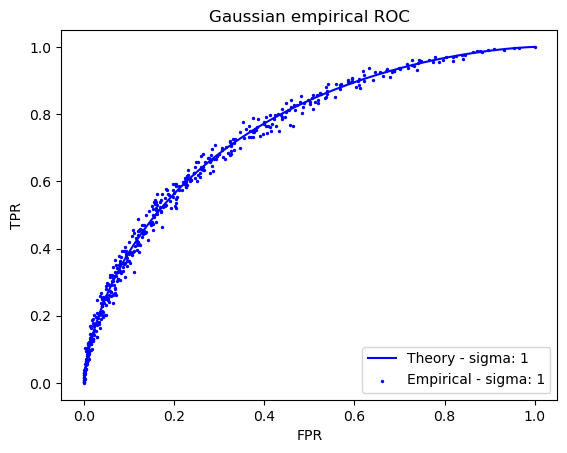

In [7]:
FPR_range = np.linspace(0, 1, 500)
mu_0 = 0
mu_1 = 1
sigma = 1
num_trials = 1000
TPR_list = [Gaussian_theoretical_ROC(FPR_range, mu_0, mu_1, sigma)]
results = [np.array([Gaussian_experiment(mu_0, mu_1, sigma, num_trials, FPR) for FPR in FPR_range])]
params = [sigma]
plot_ROC(results, FPR_range, TPR_list, params, 'Gaussian empirical ROC')

# Compute pure DP ROC bound

In [8]:
def theoretical_pure_DP_bound(FPR, epsilon):
    return 0

In [9]:
def plot_theoretical_PD_bound(FPR, TPR_list, epsilon_array, title):
    colors = list(mcolors.BASE_COLORS)
    for i, TPR in enumerate(TPR_list):
        plt.plot(FPR, TPR, label='epsilon: '+str(epsilon_array[i]), color=colors[i])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend(loc ="lower right")
    plt.title(title)
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

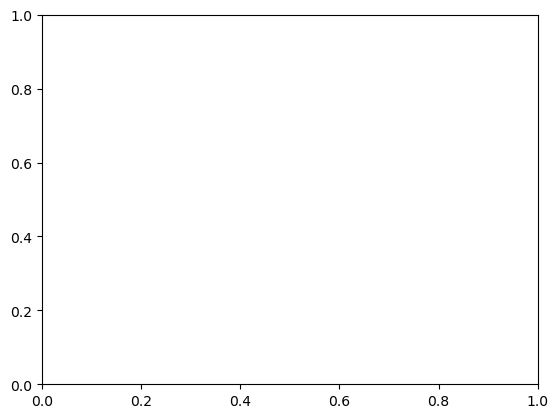

In [10]:
FPR_range = np.linspace(0, 1, 1000)
epsilon = mu_1
DP_bound_list = [theoretical_pure_DP_bound(FPR_range, epsilon)]
params = [epsilon]
plot_theoretical_PD_bound(FPR_range, DP_bound_list, params, 'Gaussian ROC')
